Cleaned Columns: ['Date', 'Patient_ID', 'Test_Type', 'Test_Category', 'Price_(GHS)', 'Result_Time_(Hrs)', 'New/Returning_Patient', 'Peak/Off-Peak', 'Referral_Source']


C:\Users\frank\AppData\Local\Temp\ipykernel_1104\2540584242.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_counts.values, y=test_counts.index, palette="viridis")


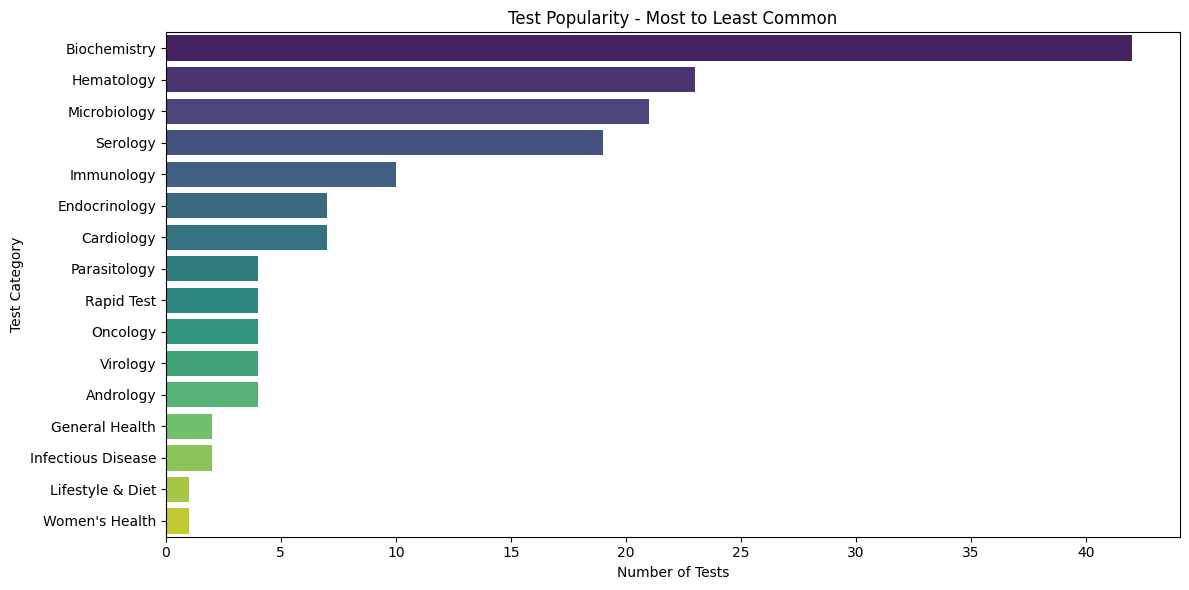

In [5]:
# 1. Popular vs. Underutilized Tests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_excel("MedLab Diagnostics Dataset.xlsx", sheet_name="Sheet1")

# Clean the column names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace(' ', '_')

# Display column names for confirmation
print("Cleaned Columns:", df.columns.tolist())

# -----------------------------------------------
# 1. Popular vs. Underutilized Tests
# -----------------------------------------------
test_counts = df['Test_Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=test_counts.values, y=test_counts.index, palette="viridis")
plt.title('Test Popularity - Most to Least Common')
plt.xlabel('Number of Tests')
plt.ylabel('Test Category')
plt.tight_layout()
plt.show()


C:\Users\frank\AppData\Local\Temp\ipykernel_23044\625631552.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




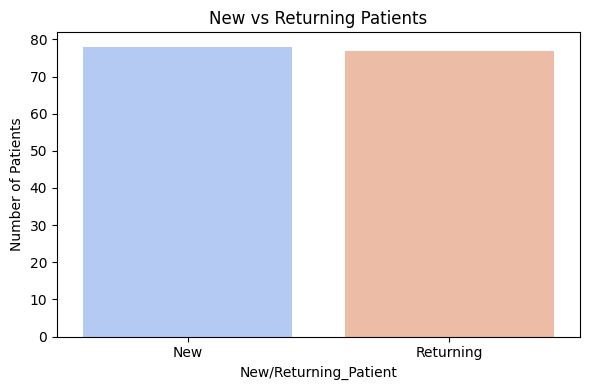

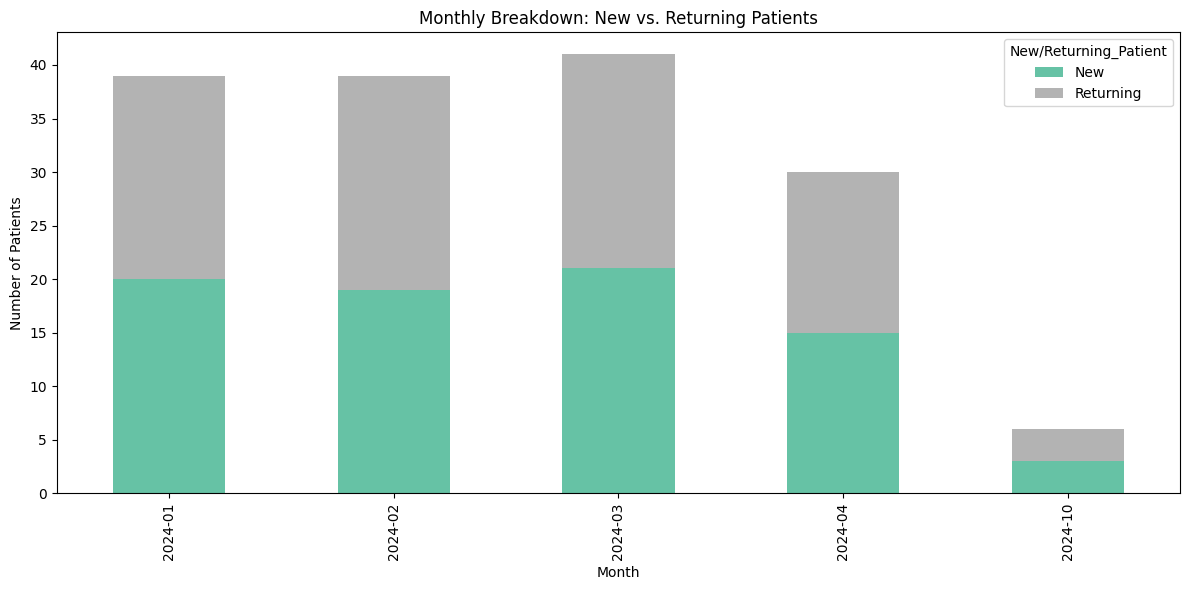

In [ ]:
# 2. New vs. Returning Patient Trends
patient_type_counts = df['New/Returning_Patient'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=patient_type_counts.index, y=patient_type_counts.values, palette='coolwarm')
plt.title('New vs Returning Patients')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Over Time Analysis (Optional)
df['Date'] = pd.to_datetime(df['Date'])
monthly_returns = df.groupby([df['Date'].dt.to_period('M'), 'New/Returning_Patient']).size().unstack().fillna(0)
monthly_returns.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Monthly Breakdown: New vs. Returning Patients')
plt.ylabel('Number of Patients')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

C:\Users\frank\AppData\Local\Temp\ipykernel_23044\4010868834.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




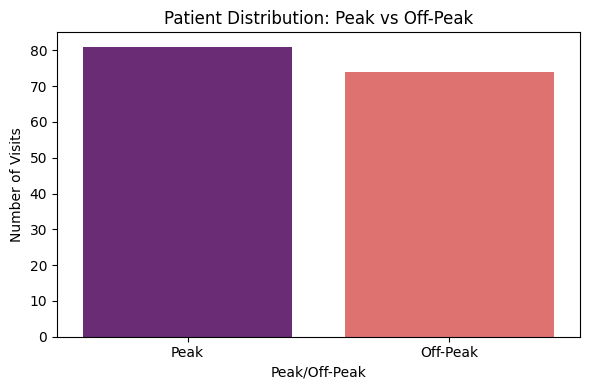

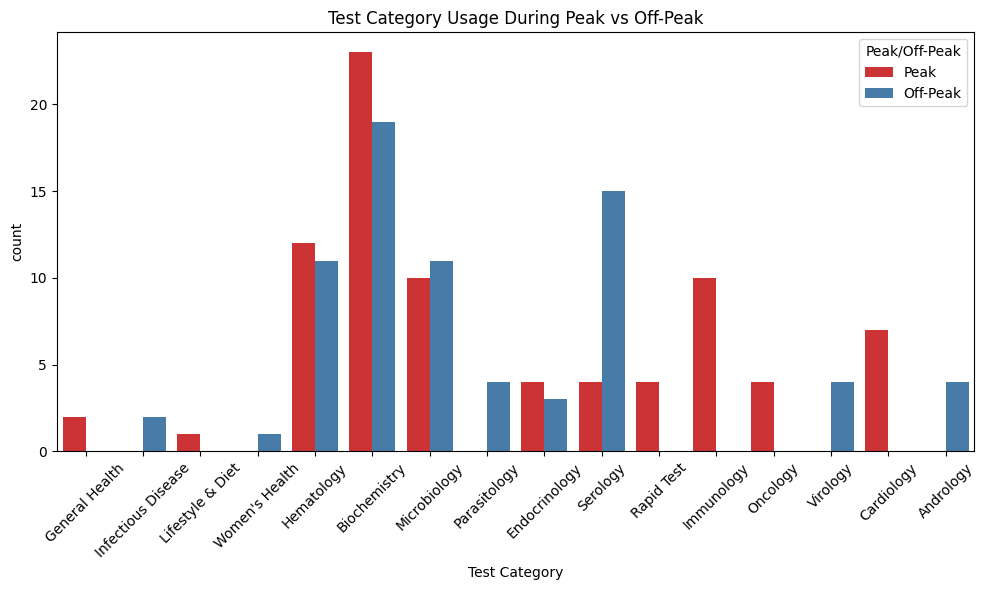

In [ ]:
# 3. Peak vs. Off-Peak Hour Trends
# -----------------------------------------------
df = pd.read_excel("MedLab Diagnostics Dataset.xlsx", sheet_name="Sheet1")
peak_counts = df['Peak/Off-Peak'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=peak_counts.index, y=peak_counts.values, palette="magma")
plt.title('Patient Distribution: Peak vs Off-Peak')
plt.ylabel('Number of Visits')
plt.tight_layout()
plt.show()

# Cross Analysis: Test Category vs Time Slot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Test Category', hue='Peak/Off-Peak', palette='Set1')
plt.title('Test Category Usage During Peak vs Off-Peak')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
